In [9]:
import covasim as cv
import numpy as np
# import networkx as nx

cv.options.set(dpi=100, show=False, close=True, verbose=0) # Standard options for Jupyter notebook

In [10]:
pars = dict(
    start_day = '2021-04-01',
    end_day = '2021-05-30',
    
    pop_type = 'matrix', 
    location = 'India-TamilNadu',

    pop_size = 100_000,
    pop_scale = 10,
    rescale = True, 
    pop_infected = 1000, 

    home_matrix = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix/home_contact.csv',
    school_matrix = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix/school_contact.csv',
    work_matrix = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix/work_contact.csv',
    community_matrix = '/mnt/d/books/iitm/agentBased/codes/tn_contact_matrix/output/contact_matrix/community_contact.csv',
    
    tiles = '/mnt/d/books/iitm/agentBased/codes/covasim/models/data/tn_quadkey.csv',
    mobility = '/mnt/d/books/iitm/agentBased/codes/covasim/models/data/mobility_matrix.csv',
    pop_density = '/mnt/d/books/iitm/agentBased/codes/covasim/models/data/pop_density.csv',

    use_waning = False,
    dynam_layer={'c': True},
    
    rand_seed=20
)

In [15]:
# Intervantions
tile_interv0 = cv.clip_tiles(
    days=4,
    changes = 0.0,
    tile_ids = np.arange(31).tolist(),
    layers = ['s', 'h', 'w', 'c']
)

tile_interv1 = cv.clip_tiles(
    days=4,
    changes=0.3,
    tile_ids = np.arange(31).tolist(),
    layers = ['s', 'h', 'w', 'c']
)

tile_interv2 = cv.clip_tiles(
    days=4,
    changes=0.7,
    tile_ids = np.arange(31).tolist(),
    layers = ['s', 'h', 'w', 'c']
)

In [12]:
# Variant 
delta = cv.variant('b16172', days=0)

In [16]:
with_interv0 = cv.Sim(interventions=[tile_interv0], variants=delta, pars=pars, label='with intervention change: 0.0')
with_interv1 = cv.Sim(interventions=[tile_interv1], variants=delta, pars=pars, label='with intervention 0.3')
with_interv2 = cv.Sim(interventions=[tile_interv2], variants=delta, pars=pars, label='with intervention 0.7')
without_interv = cv.Sim(variants=delta, pars=pars, label='without intervention')

msim = cv.MultiSim([without_interv, with_interv0, with_interv1, with_interv2])
msim.run()
# cv.parallel(without_interv, with_interv).plot(to_plot=['cum_deaths', 'cum_infections'])

MultiSim("without intervention"; n_sims: 4; base: Sim("without intervention"; 2021-04-01 to 2021-05-30; pop: 100000 matrix; epi: not run))

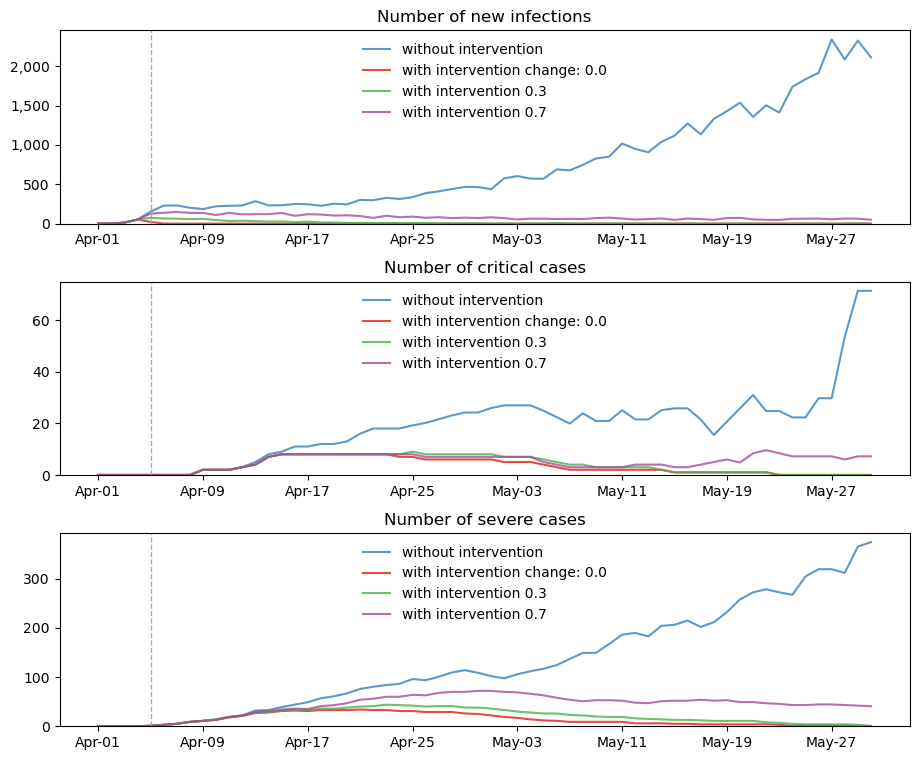

In [17]:
msim.plot(to_plot=['new_infections', 'n_critical', 'n_severe'])